In [1]:
import sys
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import os
import matplotlib as mlp
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=25, validation_data=(X_test_scaled, y_test))

Epoch 1/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4857 - accuracy: 0.8299 - val_loss: 0.4453 - val_accuracy: 0.8425
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3795 - accuracy: 0.8657 - val_loss: 0.4280 - val_accuracy: 0.8457
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3467 - accuracy: 0.8763 - val_loss: 0.3994 - val_accuracy: 0.8580
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3250 - accuracy: 0.8846 - val_loss: 0.3868 - val_accuracy: 0.8638
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3091 - accuracy: 0.8898 - val_loss: 0.3746 - val_accuracy: 0.8669
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8939 - val_loss: 0.3682 - val_accuracy: 0.8688
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2861 - accuracy: 0.8977 - val_loss: 0.3675 - val_accuracy:

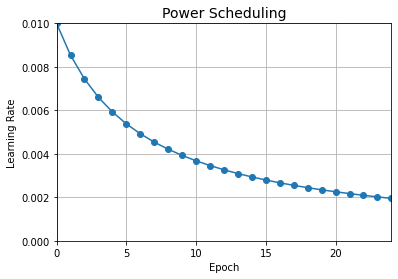

In [5]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(25)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, 25 - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()